WEATHERPY

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

GENERATE THE CITIES LIST BY USING THE CITIPY LIBRARY

In [2]:
# CELL 2 OF HOMEWORK
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


In [3]:
cities

['ushuaia',
 'belyy yar',
 'antsiranana',
 'aasiaat',
 'bubaque',
 'yellowknife',
 'port-aux-francais',
 'zhigalovo',
 'klyuchi',
 'praya',
 'vorgashor',
 'ornskoldsvik',
 'nema',
 'grytviken',
 "mil'kovo",
 'antonio enes',
 'leava',
 'springfield',
 'college',
 'kamyzyak',
 'tomball',
 'uturoa',
 'margaret river',
 'perbaungan',
 'blackmans bay',
 'visby',
 'avarua',
 'sur',
 'palmas',
 'puerto ayora',
 'makinsk',
 'port augusta',
 'fisterra',
 'puerto natales',
 'thompson',
 'longyearbyen',
 'waitangi',
 'cimitarra',
 'misratah',
 "nar'yan-mar",
 'olonkinbyen',
 'invercargill',
 'adamstown',
 'haiku-pauwela',
 'ilulissat',
 'horta',
 'pasuquin',
 'ancud',
 'berezovyy',
 'klaksvik',
 'kremenets',
 'hermanus',
 'kathu',
 'edinburgh of the seven seas',
 'vernon',
 'cole harbour',
 "kol'chugino",
 'utrik',
 'iqaluit',
 'carnarvon',
 'kyshtovka',
 'leua',
 'taiohae',
 'wailua homesteads',
 'margate',
 'mount gambier',
 'darwin',
 'ribeira grande',
 'bilibino',
 'okhotsk',
 'port mathurin'

REQUIREMENT 1: CREATE PLOTS TO SHOWCASE THE RELATIONSHIP BETWEEN WEATHER VARIABLES AND LITITUDE

USE THE OpenWeatherMap API TO RETRIEVE WEATHER DATA FROM THE CITIES LIST GENERATED IN THE STARTED CODE

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind =city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | belyy yar
Processing Record 3 of Set 1 | antsiranana
Processing Record 4 of Set 1 | aasiaat
Processing Record 5 of Set 1 | bubaque
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | zhigalovo
Processing Record 9 of Set 1 | klyuchi
Processing Record 10 of Set 1 | praya
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | ornskoldsvik
Processing Record 13 of Set 1 | nema
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | mil'kovo
Processing Record 16 of Set 1 | antonio enes
Processing Record 17 of Set 1 | leava
Processing Record 18 of Set 1 | springfield
Processing Record 19 of Set 1 | college
Processing Record 20 of Set 1 | kamyzyak
Processing Record 21 of Set 1 | tomball
Processing Record 22 of Set 1 | uturoa
Processing Record 23 of Set 1 | mar

In [6]:
# to check if url and parsing out works and what it prings back in pretty print in the webpage

url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}&appid={weather_api_key}&q={city}"
city_weather = requests.get(city_url).json()

city_lat = city_weather['coord']['lat']
city_lat = city_weather['coord']['lat']
city_lng = city_weather['coord']['lon']
city_max_temp = city_weather['main']['temp_max']
city_humidity = city_weather['main']['humidity']
city_clouds = city_weather['clouds']['all']
city_wind =city_weather['wind']['speed']
city_country = city_weather['sys']['country']
city_date = city_weather['dt']
city_weather
city_lat


47.6667

In [8]:
# CELL 4 OF HOMEWORK
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [9]:
# CELL 5 OF HOMEWORK
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,276.96,81,100,4.63,AR,1714977040
1,belyy yar,53.6039,91.3903,285.09,87,40,2.00,RU,1714977041
2,antsiranana,-12.2787,49.2917,302.57,54,20,6.17,MG,1714977041
3,aasiaat,68.7098,-52.8699,259.74,95,54,3.28,GL,1714977041
4,bubaque,11.2833,-15.8333,299.06,67,34,4.25,GW,1714977041


In [16]:
# CELL 6 OF HOMEWORK
# Export the City_Data into a csv
city_data_df.to_csv("cities_hw.csv", index_label="City_ID")

#moved to folder "output_data"

In [23]:
# CELL 7 OF HOMEWORK
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_hw.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,276.96,81,100,4.63,AR,1714977040
1,belyy yar,53.6039,91.3903,285.09,87,40,2.00,RU,1714977041
2,antsiranana,-12.2787,49.2917,302.57,54,20,6.17,MG,1714977041
3,aasiaat,68.7098,-52.8699,259.74,95,54,3.28,GL,1714977041
4,bubaque,11.2833,-15.8333,299.06,67,34,4.25,GW,1714977041


CREATE THE SCATTER PLOTS REQUESTED

LATITUDE VS TEMPERATURE

In [27]:
x=city_data_df['Lat']
x.head()


City_ID
0   -54.8000
1    53.6039
2   -12.2787
3    68.7098
4    11.2833
Name: Lat, dtype: float64

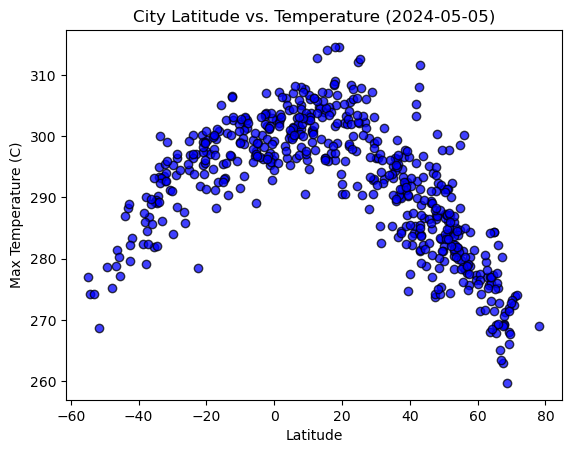

In [43]:
# CELL 8 OF HOMEWORK
# Build scatter plot for latitude vs. temperature
x=city_data_df['Lat']
y_temp=city_data_df['Max Temp']
plt.scatter(x,y_temp,marker="o",facecolors="blue",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("City Latitude vs. Temperature (2024-05-05)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1_hw.png")

# Show plot
plt.show()

LATITUDE VS HUMIDITY

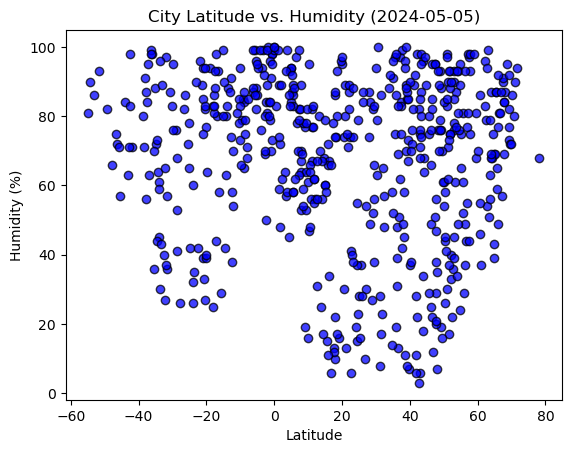

In [44]:
# CELL 9 OF HOMEWORK

x=city_data_df['Lat']
y_h=city_data_df['Humidity']
plt.scatter(x,y_h,marker="o",facecolors="blue",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("City Latitude vs. Humidity (2024-05-05)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2_hw.png")

# Show plot
plt.show()

LATITUDE VS CLOUDINESS

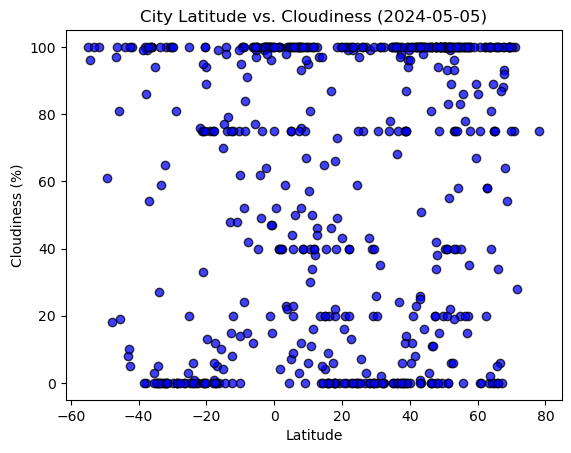

In [45]:
# CELL 10 OF HOMEWORK

x=city_data_df['Lat']
yc=city_data_df['Cloudiness']
plt.scatter(x,yc,marker="o",facecolors="blue",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness (2024-05-05)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3_hw.png")

# Show plot
plt.show()

LATITUDE VS WIND SPEED PLOT

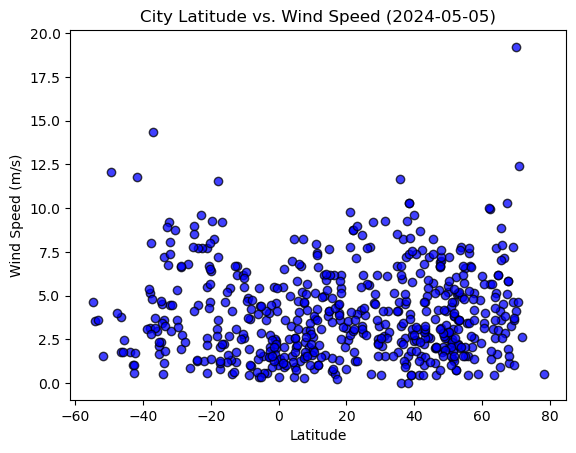

In [46]:
#CELL 11 OF HOMEWORK

x=city_data_df['Lat']
yw=city_data_df['Wind Speed']
plt.scatter(x,yw,marker="o",facecolors="blue",edgecolors="black",alpha=0.75)

# Incorporate the other graph properties

plt.title("City Latitude vs. Wind Speed (2024-05-05)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4_hw.png")

# Show plot
plt.show()

REQUIREMENT 2: COMPUTE LINEAR REGRESSION FOR EACH RELATIONSHIP

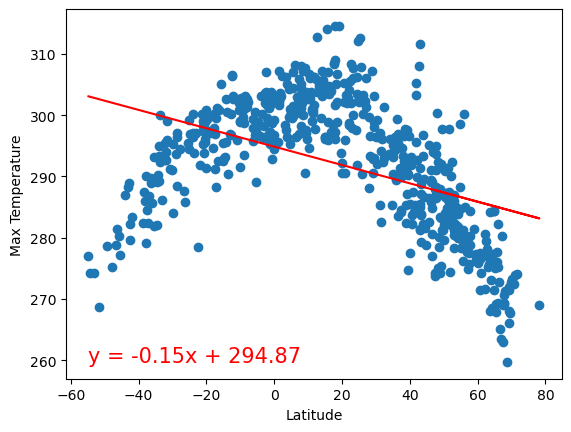

In [49]:
#Cell 12 OF HOMEWORK
# Define a function to create Linear Regression plots
x_values = x
y_values = y_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature');
#plt.show()

In [54]:
# CELL 13 OF HOMEWORK
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,belyy yar,53.6039,91.3903,285.09,87,40,2.00,RU,1714977041
3,aasiaat,68.7098,-52.8699,259.74,95,54,3.28,GL,1714977041
4,bubaque,11.2833,-15.8333,299.06,67,34,4.25,GW,1714977041
5,yellowknife,62.4560,-114.3525,279.49,79,20,5.66,CA,1714977041
7,zhigalovo,54.8097,105.1578,298.63,24,83,5.71,RU,1714977042


In [55]:
# CELL 14 OF HOMEWORK
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,276.96,81,100,4.63,AR,1714977040
2,antsiranana,-12.2787,49.2917,302.57,54,20,6.17,MG,1714977041
6,port-aux-francais,-49.3500,70.2167,278.61,82,61,12.09,TF,1714977041
13,grytviken,-54.2811,-36.5092,274.28,90,96,3.52,GS,1714977043
15,antonio enes,-16.2325,39.9086,300.86,58,0,2.20,MZ,1714977043


TEMPERATURE VS LATITUDE LINAR REGRESION PLOT

The r-value is: -0.8466466524679436


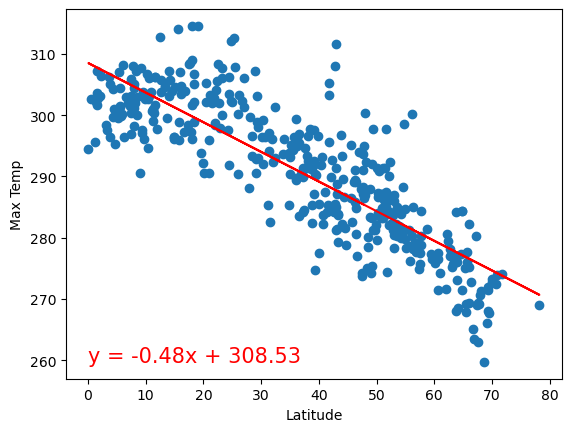

In [60]:
#CELL 15 OF HOMEWORK
# Linear regression on Northern Hemisphere
x_val = northern_hemi_df['Lat']
y_val = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(min(x_val),min(y_val)),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}");

The r-value is: 0.7837410830261864


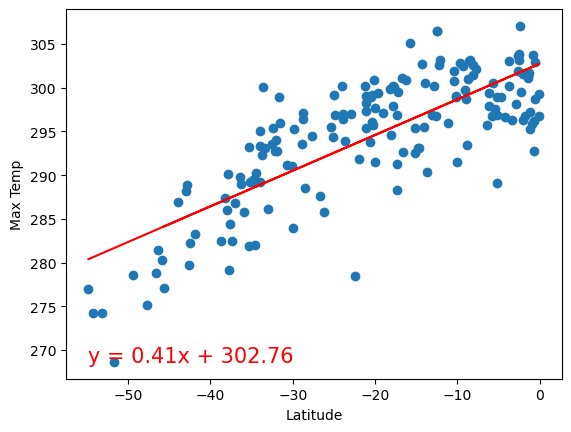

In [67]:
# CELL 16 OF HOMEWORK
# Linear regression on Southern Hemisphere

x_valsh = southern_hemi_df['Lat']
y_valsh = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_valsh, y_valsh)
regress_valsh = x_valsh * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_valsh,y_valsh)
plt.plot(x_valsh,regress_valsh,"r-")
plt.annotate(line_eq,(min(x_valsh),min(y_valsh)),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}");

DISCUSSION ABOUT THE LINEAR REALTIONSHIP:

The linear relationship between the max temperature and the latitude shows of both hemispheres have absolute r-values that are strong. The farther you are away from the equator of the earth, the colder it gets in either direction of it. 

HUMIDITY VS LATITUDE LINEAR REGRESSION PLOT

The r-value is: 0.06619134269737949


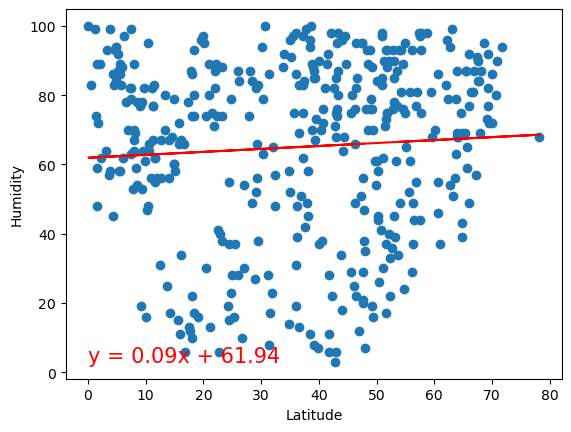

In [72]:
#CELL 17 OF HOMEWORK
# Linear regression on Northern Hemisphere
x_val_nhum = northern_hemi_df['Lat']
y_val_nhum = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val_nhum, y_val_nhum)
regress_val_nhum = x_val_nhum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val_nhum,y_val_nhum)
plt.plot(x_val_nhum,regress_val_nhum,"r-")
plt.annotate(line_eq,(min(x_val_nhum),min(y_val_nhum)),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}");

The r-value is: 0.22808727917615323


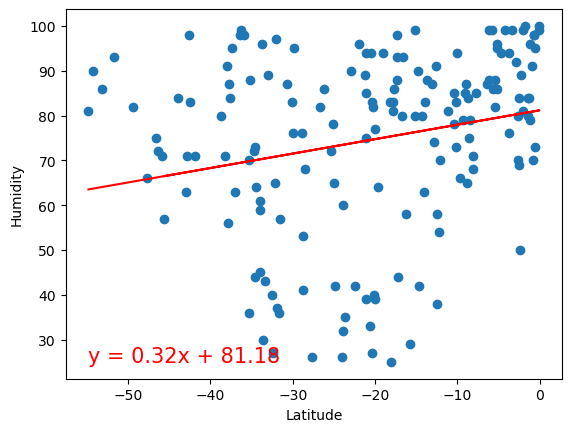

In [71]:
# CELL 18 OF HOMEWORK
# Linear regression on Southern Hemisphere

x_val_shum = southern_hemi_df['Lat']
y_val_shum = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val_shum, y_val_shum)
regress_val_shum = x_val_shum * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val_shum,y_val_shum)
plt.plot(x_val_shum,regress_val_shum,"r-")
plt.annotate(line_eq,(min(x_val_shum),min(y_val_shum)),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}");

DISCUSSION ABOUT THE LINEAR RELATIONSHIP:

I'm actually a little surprised that the southern hemisphere's humidity has a stronger rvalue than northern hemispher's humidity. Then again humidity is just the amount of water vapor is in the air. The data might have locations clustered closer towards desert areas or more inland away from water which could be why there's less corrolation between humiidty and the latitude points in the data set.

CLOUDINESS VS LATITUDE LINEAR REGRESSION PLOT

The r-value is: 0.15318985555628034


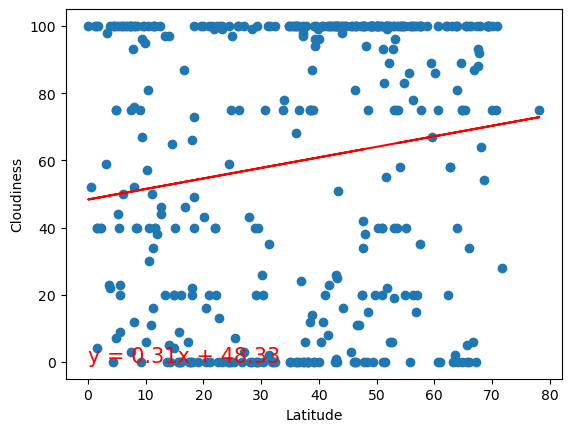

In [73]:
# Cell 19 OF HOMEWORK
# Northern Hemisphere

x_val_c = northern_hemi_df['Lat']
y_val_c = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val_c, y_val_c)
regress_val_c = x_val_c * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val_c,y_val_c)
plt.plot(x_val_c,regress_val_c,"r-")
plt.annotate(line_eq,(min(x_val_c),min(y_val_c)),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}");

The r-value is: 0.1932243963878104


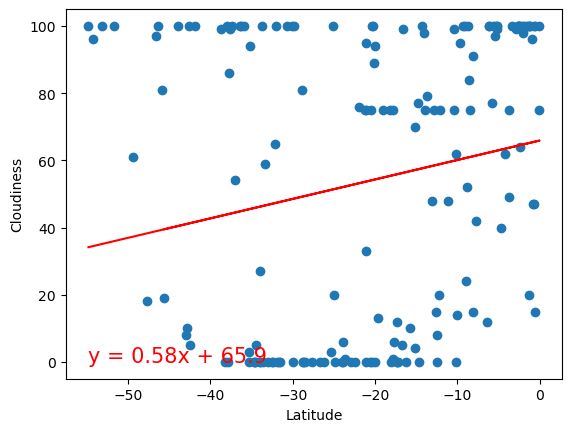

In [75]:
# CELL 20 OF HOMEWORK
# Southern Hemisphere
x_val_sc = southern_hemi_df['Lat']
y_val_sc = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val_sc, y_val_sc)
regress_val_sc = x_val_sc * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val_sc,y_val_sc)
plt.plot(x_val_sc,regress_val_sc,"r-")
plt.annotate(line_eq,(min(x_val_sc),min(y_val_sc)),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}");

DISCUSSION ABOUT THE LINEAR RELATIONSHIP:

Cloudiness seems to be in the extremes and don't really correlate with how near or far you are from the equator; or at least with this dataset. Very low r values on both the north and south hemispheres.

WIND SPEED VS LATITUDE LINEAR REGRESSION PLOT

The r-value is: 0.12089546875112601


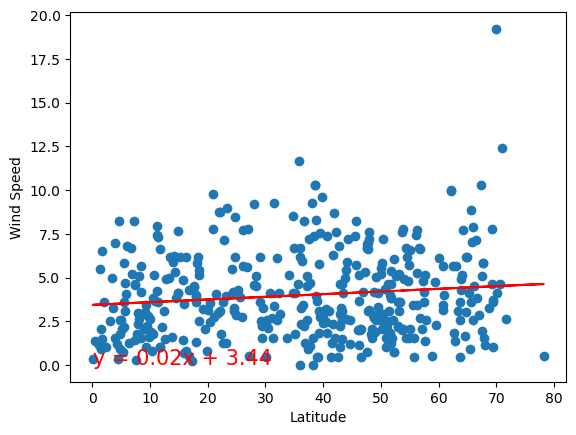

In [76]:
# cell 21 OF HOMEWORK
# Northern Hemisphere
x_val_ws = northern_hemi_df['Lat']
y_val_ws = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val_ws, y_val_ws)
regress_val_ws = x_val_ws * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val_ws,y_val_ws)
plt.plot(x_val_ws,regress_val_ws,"r-")
plt.annotate(line_eq,(min(x_val_ws),min(y_val_ws)),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}");

The r-value is: -0.21164909673612528


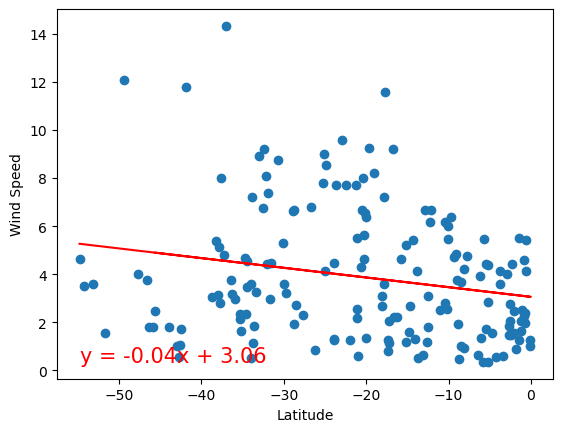

In [77]:
# CELL 22 OF HOMEWORK
# Southern Hemisphere
x_val_sws = southern_hemi_df['Lat']
y_val_sws = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val_sws, y_val_sws)
regress_val_sws = x_val_sws * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val_sws,y_val_sws)
plt.plot(x_val_sws,regress_val_sws,"r-")
plt.annotate(line_eq,(min(x_val_sws),min(y_val_sws)),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}");

DISCUSSION ABOUT THE LINEAR RELATIONSHIP:

I'm actually surprised there doesn't seem to be any correlation between windspeed and where you are closer or farther you are from the equator. Both norther and souther hemispheres have low r values and there seems to be more outliners than all the other previous linear regressions I've calculated.